# Diabetes Prediction CSC 2621 Final Project


### Group Members:
###### Oliver Grudzinski
###### Pranaav Paladugu
###### Alec Weinbender

## Research Question

With this project, we are attempting to see whether there any variables that we can use to diagnostically predict whether or not a patient has diabetes, based on the data in the dataset.

## Hypotheses

#### Hypotheses Statements:

Null Hypothesis Example - A given variable does not influence whether a patient may have diabetes.

Alternative Hypothesis Example - A given variable does influence whether a patient may have diabetes.

These are all the variables that we will be looking at: Pregnancies, Glucose, Blood Pressure, Skin Thickness, Insulin, BMI, Diabetes Pedigree Function, Age.


Examples:

H0 (Glucose) – Glucose levels do not influence whether a patient may have diabetes.

HA (Glucose) – Glucose levels do have an influence on whether a patient may have diabetes.

H0 (BMI) – The patient’s BMI does not influence whether a patient may have diabetes.

HA (BMI) – The patient’s BMI does influence on whether a patient may have diabetes.

H0 (Age) – The patient’s age does not influence whether a patient may have diabetes.

HA (Age) – The patient’s age does influence on whether a patient may have diabetes.

H0 (Diabetes Pedigree Function) – The patient’s DPF levels do not influence whether a patient may have diabetes.

HA (Diabetes Pedigree Function) – The patient’s DPF levels do have an influence on whether a patient may have diabetes.

## Dataset

### Explanation of the Dataset:

This dataset was created to do what we are doing, which is to diagnostically predict whether or not a patient has diabetes. All of the data in this dataset is taken from female patients that are at least 21 years old and of Pima Indian heritage.

Source: https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database?resource=download

#### Description of Features:
Pregnancies: Number of times pregnant

Glucose: Plasma glucose concentration at 2 hours in an oral glucose tolerance test

Blood Pressure: Diastolic blood pressure (mm Hg)

Skin Thickness: Triceps skin fold thickness (mm)

Insulin: 2-Hour serum insulin (mu U/ml)

BMI: Body mass index (weight in kg/(height in m)^2)

Diabetes Pedigree Function: Diabetes pedigree function

Age: patient's (years)

#### Target Variable:
The target variable is Outcomes:

0 = Negative for Diabetes (500)

1 = Positive for Diabetes (268)

In [1]:
import pandas as pd

df = pd.read_csv("data/diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## Data Preprocessing

#### Identifying Features

In [2]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


We are going to move forward with using all of the features given in the dataframe as they are all distinct and have the ability to be used for testing and modeling.

In [3]:
features = df.columns.drop('Outcome').tolist()
features

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age']

#### Handling Missing and/or Null Values

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


No null values in the dataframe!

##### Searching for Miscalculated Zeros

In [5]:
for column in features:
    num_zeros = (df[column] == 0).sum()
    print(f"Number of 0s in '{column}': {num_zeros}")

Number of 0s in 'Pregnancies': 111
Number of 0s in 'Glucose': 5
Number of 0s in 'BloodPressure': 35
Number of 0s in 'SkinThickness': 227
Number of 0s in 'Insulin': 374
Number of 0s in 'BMI': 11
Number of 0s in 'DiabetesPedigreeFunction': 0
Number of 0s in 'Age': 0


Looking at the columns with 0's, we should replace or drop the values that are continous variables that don't make sense having zero's.

For this, it makes sense to replace the columns of Glucose, Blood Pressure, Skin Thickness, Insulin, and BMI as they are all variables that should be above zero.

We are going to replace the values by entering the mean values of the columns where there the values are 0.

In [6]:
columns_to_check = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

for column in columns_to_check:
    mean_value = df.loc[df[column] != 0, column].mean() # skip 0 values
    df[column] = df[column].replace(0, mean_value)
    num_zeros = (df[column] == 0).sum()
    print(f"Number of 0s in '{column}': {num_zeros}")

Number of 0s in 'Glucose': 0
Number of 0s in 'BloodPressure': 0
Number of 0s in 'SkinThickness': 0
Number of 0s in 'Insulin': 0
Number of 0s in 'BMI': 0


In [7]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.686763,72.405184,29.153420,155.548223,32.457464,0.471876,33.240885,0.348958
std,3.369578,30.435949,12.096346,8.790942,85.021108,6.875151,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,25.000000,121.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.202592,29.153420,155.548223,32.400000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,155.548223,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


## Data Analysis and Visualization

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

#### Viewing the Data after Preprocessing

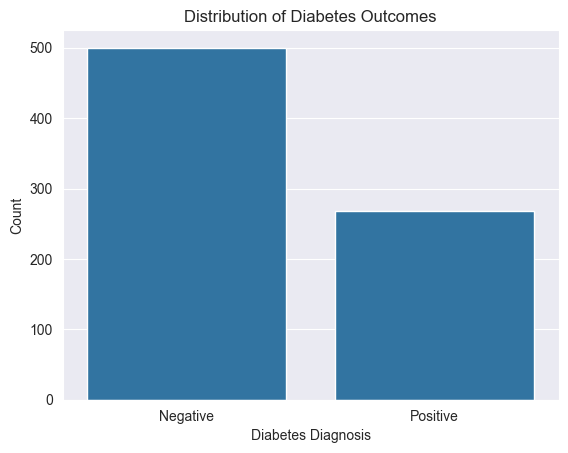

In [9]:
outcomes = df['Outcome']
sns.countplot(x=outcomes)
plt.xticks([0, 1], ["Negative", "Positive"])
plt.xlabel("Diabetes Diagnosis")
plt.ylabel("Count")
plt.title("Distribution of Diabetes Outcomes")
plt.show()

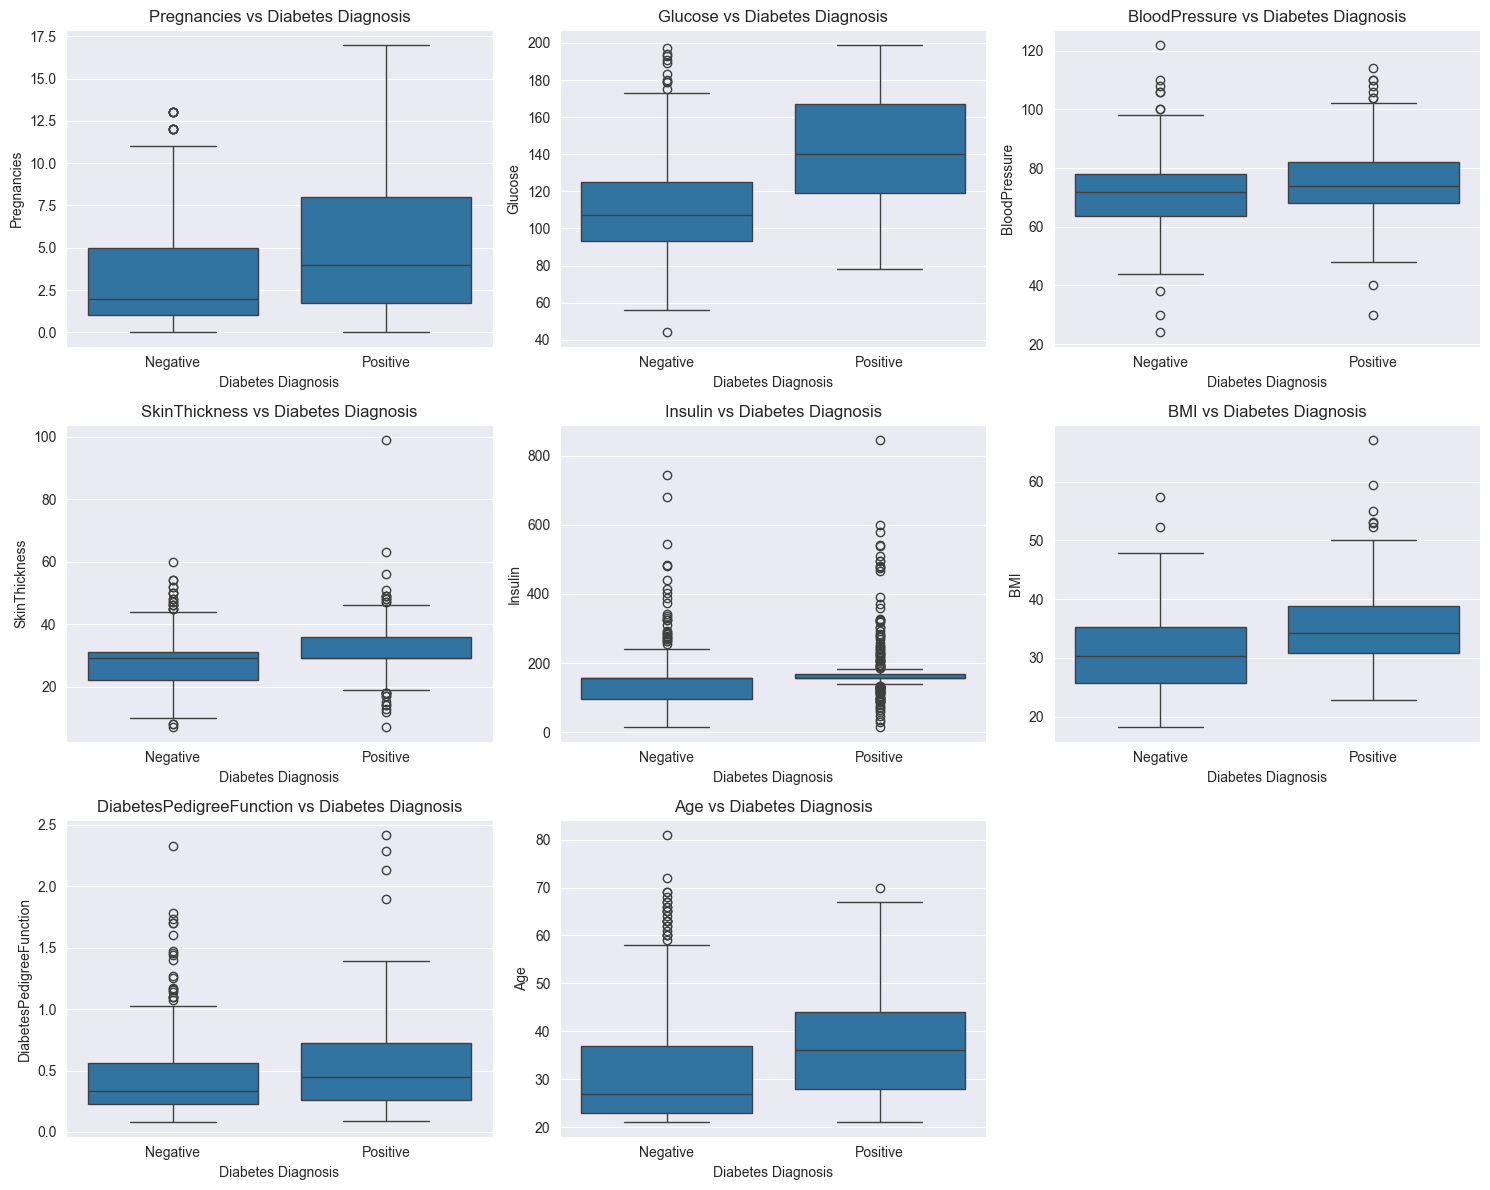

In [10]:
features = df.columns.drop('Outcome')
num_features = len(features)
cols = 3
rows = (num_features + cols - 1) // cols
plt.figure(figsize=(5 * cols, 4 * rows))
for i, feature in enumerate(features):
    plt.subplot(rows, cols, i + 1)
    sns.boxplot(x=outcomes, y=df[feature])
    plt.xlabel("Diabetes Diagnosis")
    plt.ylabel(feature)
    plt.xticks([0, 1], ["Negative", "Positive"])
    plt.title(f"{feature} vs Diabetes Diagnosis")

plt.tight_layout()
plt.show()

#### Hypothesis Testing

In [11]:
from scipy import stats
import pandas as pd

target = df["Outcome"]
features = df.columns.drop("Outcome")
n_samples = len(df)

alpha = 0.05
num_tests = len(features)
threshold = alpha/num_tests #Bonferroni Correction


Dict = {}
var = []
pval = []
Dict = {"Variable":[], "T-stat": [], "P-value": [], "Significant":[]}
count = 0
for variable in features:
        samples_by_group = []
        for value in set(df[variable]):
            mask = df[variable] == value
            samples_by_group.append(df['Outcome'][mask])
        kstat, Kp = stats.kruskal(*samples_by_group)
        significant = True
        if(Kp < ((threshold)/n_samples)):
            significant = True
        elif(Kp > ((threshold)/n_samples)):
            significant = False
        Dict["T-stat"].append(kstat)
        Dict["P-value"].append(Kp)
        pval.append(Kp)
        var.append(variable)
        Dict["Significant"].append(significant)
        Dict["Variable"].append(variable)

table = pd.DataFrame(Dict)

sorted_df = table.sort_values(by=['P-value'], ascending=True)

sorted_df.head(10)

,Variable,T-stat,P-value,Significant
1,Glucose,269.382027,5.586210e-11,True
7,Age,140.754007,2.450833e-10,True
0,Pregnancies,64.510701,8.940856e-08,True
3,SkinThickness,73.467109,1.699207e-02,False
4,Insulin,227.473254,1.818808e-02,False
5,BMI,286.097245,4.422738e-02,False
2,BloodPressure,54.862435,1.738525e-01,False
6,DiabetesPedigreeFunction,532.330054,3.002203e-01,False


#### Visualizing Significant Variables

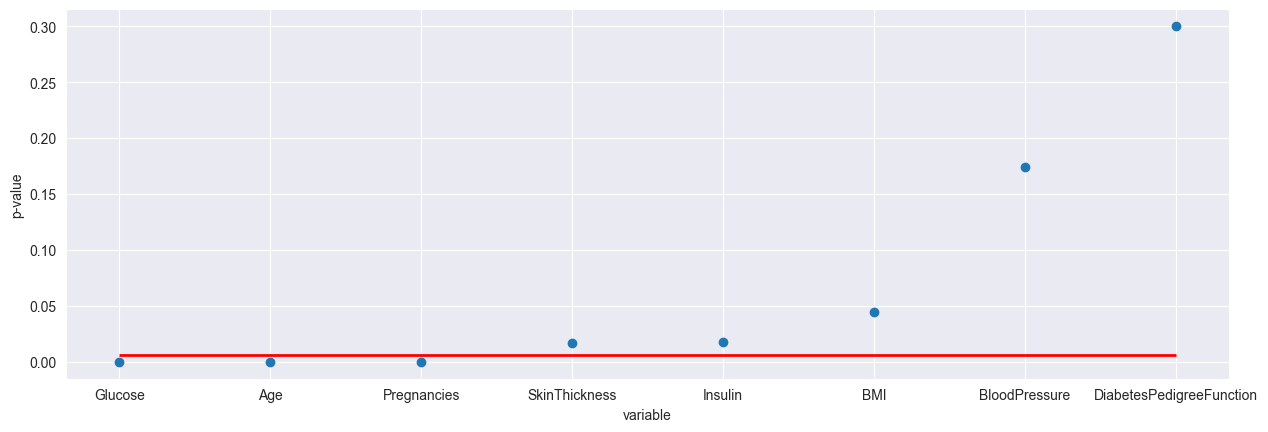

In [12]:
import matplotlib.pyplot as plt
import numpy as np

x = np.array(sorted_df['Variable'])
y = np.array(sorted_df['P-value'])

f = plt.figure()
f.set_figwidth(15)

plt.xlabel('variable')
plt.ylabel('p-value')

plt.scatter(x, y)
plt.hlines(y=threshold, xmin=0, xmax=7, linewidth=2, color='r')
plt.show()

In [13]:
significant_variables = sorted_df[sorted_df["Significant"] == True]["Variable"].tolist()
significant_variables

['Glucose', 'Age', 'Pregnancies']

We will reject the null hypotheses for the variables Glucose, Age, and Pregnancies.

We have failed to reject the null hypotheses for the variables Skin Thickness, Insulin, BMI, Blood Pressure, and DiabetesPedigreeFunction.

## Data Modeling and Prediction

#### Scaling/Normalizing

We will not need to scale or normalize our data as we are going to be building a Random Forest Classifier model.

### Baseline Model with Optimized Parameters

##### Finding Optimal max_leaf_nodes

max_leaf_nodes: 2, Validation Accuracy: 0.6696
max_leaf_nodes: 5, Validation Accuracy: 0.7478
max_leaf_nodes: 10, Validation Accuracy: 0.7565
max_leaf_nodes: 15, Validation Accuracy: 0.7826
max_leaf_nodes: 20, Validation Accuracy: 0.7478
max_leaf_nodes: 25, Validation Accuracy: 0.7565
max_leaf_nodes: 30, Validation Accuracy: 0.7652
max_leaf_nodes: 40, Validation Accuracy: 0.7652
max_leaf_nodes: 50, Validation Accuracy: 0.7739
max_leaf_nodes: 60, Validation Accuracy: 0.7739
max_leaf_nodes: 70, Validation Accuracy: 0.7739
max_leaf_nodes: 80, Validation Accuracy: 0.7826
max_leaf_nodes: 90, Validation Accuracy: 0.7739
max_leaf_nodes: 100, Validation Accuracy: 0.7913
max_leaf_nodes: 125, Validation Accuracy: 0.7913
max_leaf_nodes: 150, Validation Accuracy: 0.7913

Optimal number of max_leaf_nodes: 100

Test Accuracy with 100 leaf nodes: 0.7500


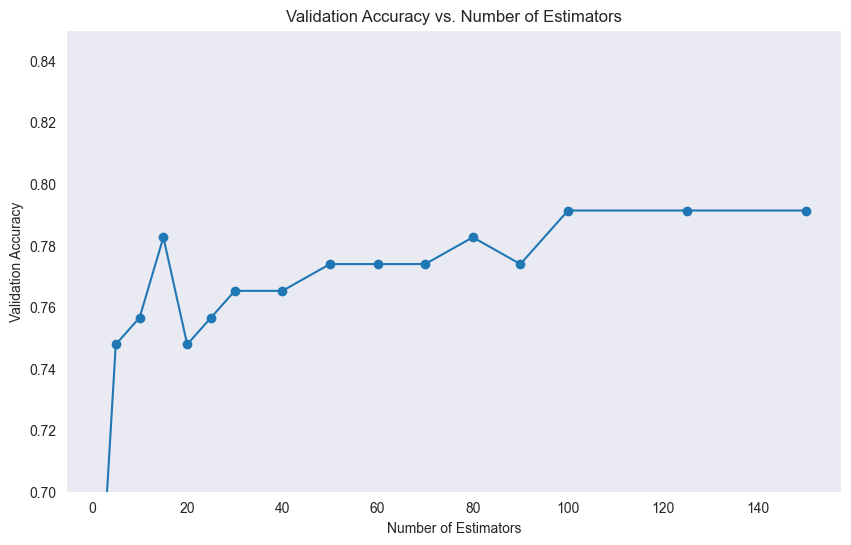

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Define features and target variable
X = df[features]
y = df["Outcome"]

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

# Range of max_leaf_nodes to test
leaf_nodes_range = [2, 5, 10, 15, 20, 25, 30, 40, 50, 60, 70, 80, 90, 100, 125, 150]

# Dictionary to store validation accuracies
validation_accuracies = {}

for max_leaf_node in leaf_nodes_range:
    model = RandomForestClassifier(random_state=42, n_estimators=40, max_leaf_nodes=max_leaf_node)
    model.fit(X_train, y_train)
    y_val_pred = model.predict(X_val)
    accuracy = accuracy_score(y_val, y_val_pred)
    validation_accuracies[max_leaf_node] = accuracy
    print(f"max_leaf_nodes: {max_leaf_node}, Validation Accuracy: {accuracy:.4f}")


# Find the best max_leaf_nodes from the best validation accuracy
max_leaf_nodes = max(validation_accuracies, key=validation_accuracies.get)
print(f"\nOptimal number of max_leaf_nodes: {max_leaf_nodes}")

# Plot validation accuracies
plt.figure(figsize=(10, 6))
plt.plot(leaf_nodes_range, validation_accuracies.values(), marker='o', linestyle='-')
plt.title("Validation Accuracy vs. Number of Estimators")
plt.xlabel("Number of Estimators")
plt.ylabel("Validation Accuracy")
plt.ylim(0.7, 0.85)  # Set y-axis to start at 0
plt.grid()
plt.show()

##### Finding Optimal n_estimators

n_estimators: 2, Validation Accuracy: 0.7043
n_estimators: 5, Validation Accuracy: 0.7217
n_estimators: 10, Validation Accuracy: 0.7478
n_estimators: 15, Validation Accuracy: 0.7478
n_estimators: 20, Validation Accuracy: 0.7652
n_estimators: 25, Validation Accuracy: 0.8174
n_estimators: 30, Validation Accuracy: 0.7913
n_estimators: 40, Validation Accuracy: 0.7913
n_estimators: 50, Validation Accuracy: 0.7826
n_estimators: 60, Validation Accuracy: 0.7739
n_estimators: 70, Validation Accuracy: 0.7739
n_estimators: 80, Validation Accuracy: 0.7652
n_estimators: 90, Validation Accuracy: 0.7565
n_estimators: 100, Validation Accuracy: 0.7565
n_estimators: 125, Validation Accuracy: 0.7478
n_estimators: 150, Validation Accuracy: 0.7478

Optimal number of estimators: 25

Test Accuracy with 25 estimators: 0.7414


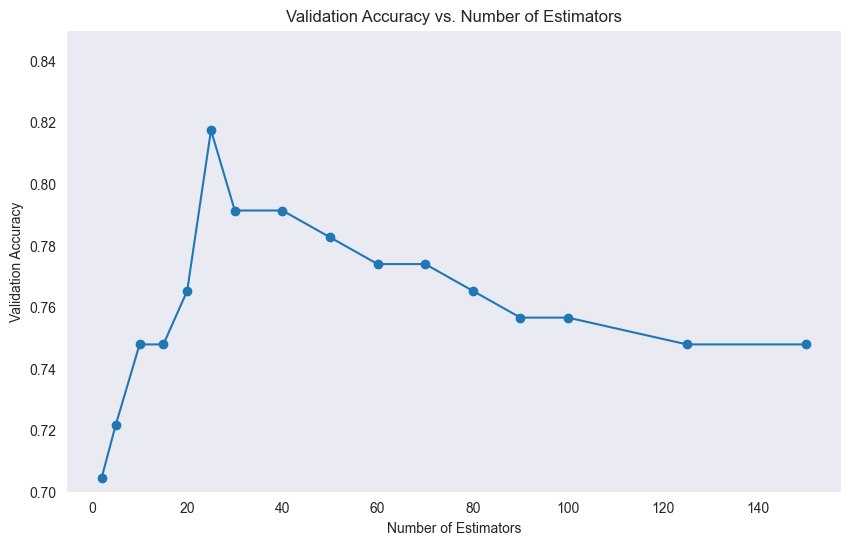

In [30]:
# Define features and target variable
X = df[features]
y = df["Outcome"]

# Split the data into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

# Range of n_estimators to test
n_estimators_range = [2, 5, 10, 15, 20, 25, 30, 40, 50, 60, 70, 80, 90, 100, 125, 150]

# Dictionary to store validation accuracies
validation_accuracies = {}

# Find the optimal number of estimators
for n_estimators in n_estimators_range:
    model = RandomForestClassifier(random_state=42, n_estimators=n_estimators, max_leaf_nodes=max_leaf_nodes)
    model.fit(X_train, y_train)
    y_val_pred = model.predict(X_val)
    accuracy = accuracy_score(y_val, y_val_pred)
    validation_accuracies[n_estimators] = accuracy
    print(f"n_estimators: {n_estimators}, Validation Accuracy: {accuracy:.4f}")

# Find the n_estimators with the best validation accuracy
optimal_n_estimators = max(validation_accuracies, key=validation_accuracies.get)
print(f"\nOptimal number of estimators: {optimal_n_estimators}")

# Train the final model with the optimal number of estimators
optimized_estimators_model = RandomForestClassifier(random_state=42, n_estimators=optimal_n_estimators, max_leaf_nodes=max_leaf_nodes)
optimized_estimators_model.fit(X_train, y_train)

# Evaluate the model on the test set
y_test_pred = optimized_estimators_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"\nTest Accuracy with {optimal_n_estimators} estimators: {test_accuracy:.4f}")

# Plot validation accuracies
plt.figure(figsize=(10, 6))
plt.plot(n_estimators_range, validation_accuracies.values(), marker='o', linestyle='-')
plt.title("Validation Accuracy vs. Number of Estimators")
plt.xlabel("Number of Estimators")
plt.ylabel("Validation Accuracy")
plt.ylim(0.7,0.85)  # Set y-axis to start at 0
plt.grid()
plt.show()

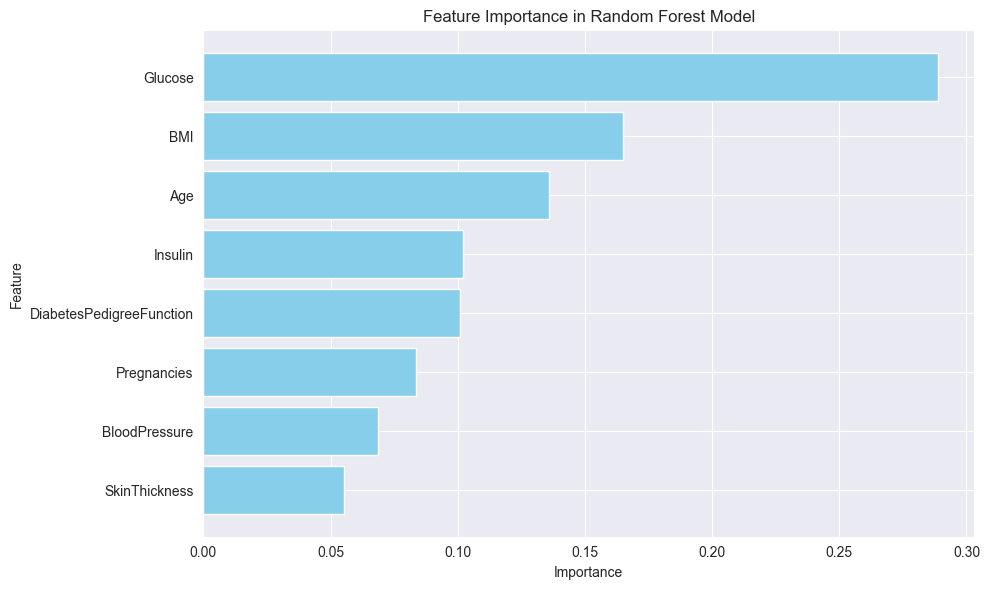

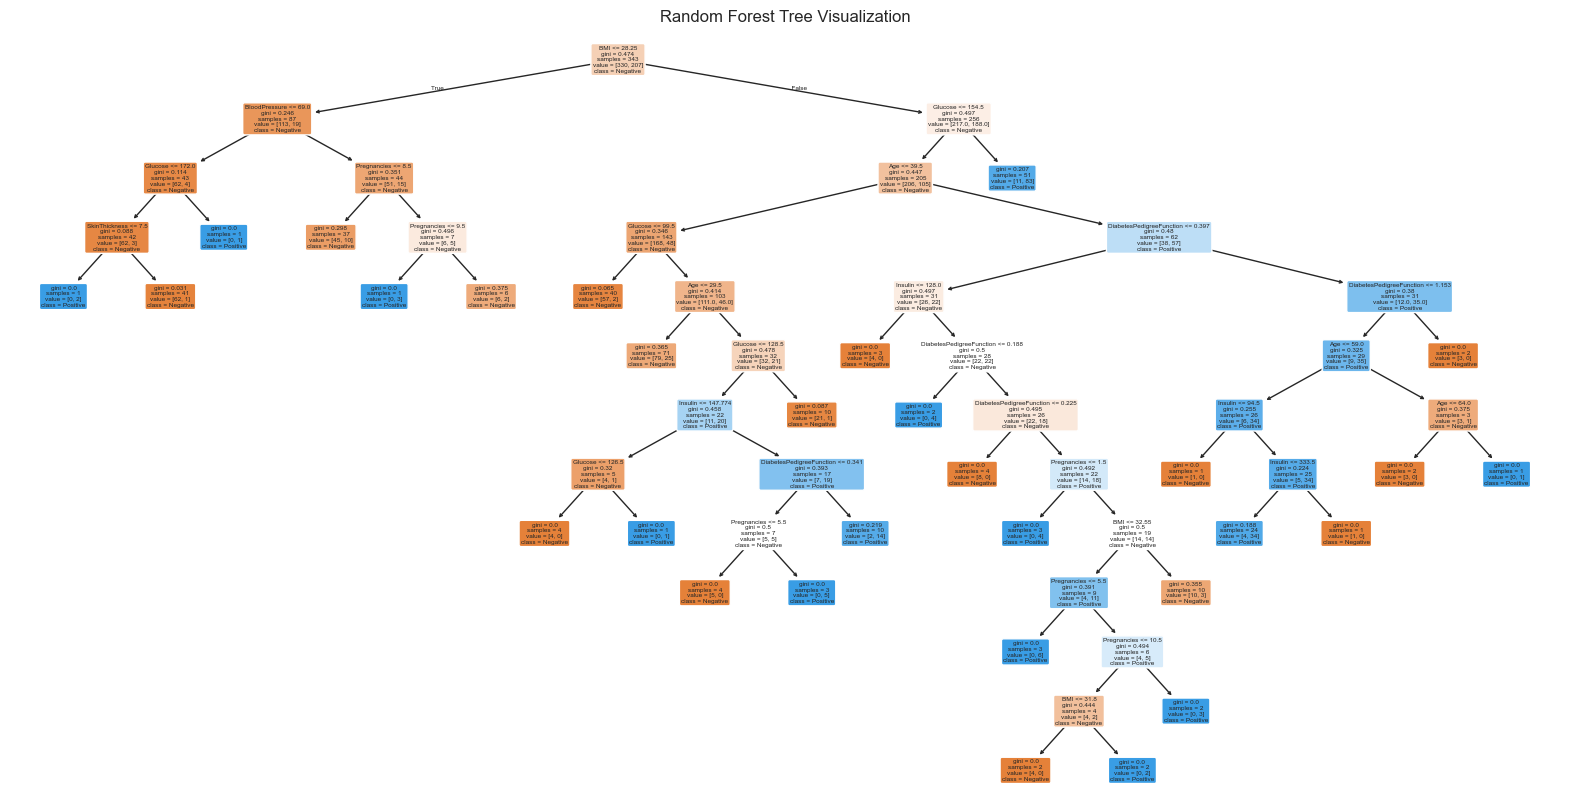

In [17]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.tree import plot_tree

def visualize_forest(forest, feature_names):
    importance_df = pd.DataFrame({
        "Feature": feature_names,
        "Importance": forest.feature_importances_
    }).sort_values("Importance", ascending=False)

    plt.figure(figsize=(10, 6))
    plt.barh(importance_df["Feature"], importance_df["Importance"], color="skyblue")
    plt.gca().invert_yaxis()  # Invert y-axis to show the most important feature at the top
    plt.title("Feature Importance in Random Forest Model")
    plt.xlabel("Importance")
    plt.ylabel("Feature")
    plt.tight_layout()
    plt.show()

    plt.figure(figsize=(20, 10))
    plot_tree(forest.estimators_[0], feature_names=feature_names, class_names=["Negative", "Positive"], filled=True, rounded=True)
    plt.title("Random Forest Tree Visualization")
    plt.show()

# Feature importance visualization
visualize_forest(rf_model, features)

### Significant Feature Selection Model

In [ ]:
X = df[significant_variables]
y = df["Outcome"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
significant_model = RandomForestClassifier(random_state=42, n_estimators=optimal_n_estimators, max_leaf_nodes=30)
significant_model.fit(X_train, y_train)

y_test_pred = significant_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"\nTest Accuracy with {optimal_n_estimators} estimators: {test_accuracy:.4f}")

# Feature importance visualization
visualize_forest(significant_model, significant_variables)

### Greedy Model

In [ ]:
# Rank features by importance
importances = rf_model.feature_importances_
importances_sorted_indices = importances.argsort()[::-1]
features_sorted = [features[i] for i in importances_sorted_indices]
features_sorted

In [ ]:
# Add new features to the model one by one (greedy approach)

greedy_features = []
accuracy = 0
for feature in features_sorted:
    X = df[greedy_features + [feature]]
    y = df["Outcome"]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
    model = RandomForestClassifier(random_state=42, n_estimators=optimal_n_estimators, max_leaf_nodes=30)
    model.fit(X_train, y_train)

    y_test_pred = model.predict(X_test)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    if test_accuracy > accuracy:
        accuracy = test_accuracy
        greedy_features.append(feature)
        print(f"Added feature: {feature}, Test Accuracy: {test_accuracy:.4f}")
    else:
        print(f"Not added feature: {feature}. Test Accuracy: {test_accuracy:.4f}")

added_features

In [ ]:
X = df[greedy_features]
y = df["Outcome"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

greedy_model = RandomForestClassifier(random_state=42, n_estimators=optimal_n_estimators, max_leaf_nodes=30)
greedy_model.fit(X_train, y_train)

y_test_pred = greedy_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"\nTest Accuracy with {optimal_n_estimators} estimators: {test_accuracy:.4f}")

# Feature importance visualization
visualize_forest(greedy_model, greedy_features)

## Results Analysis